In [2]:
#Import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Funnction definition for extracting points for transformation
def get_old_and_newpoints(path_to_image):
    
    #Picking up Left Mouse Click point
    def point_click(event, x,y, flags, param):
        global clickX, clickY
        if event == cv2.EVENT_LBUTTONDOWN:
            clickX, clickY = x, y   
    
    #Defining the picked-up point pair for making lines
    def point_tuples(x,y):
            x = x[1:]
            y = y[1:]
            pts = np.empty((len(x),2), np.int32)
            for i in range(len(x)):
                pts[i,0]= x[i]
                pts[i,1]= y[i]
            return(pts)
    
    #Funnction to draw lines
    def polydraw(pts, image,closed, b,g,r):
        cv2.polylines(image, [pts], closed,(b,g,r), 2)
    
    #Function for real time point picking an visualizing the picked up region
    def lol_function(path, mode, points=None):
        img = cv2.imread(path)
        if mode == True:
            polydraw(points,img,True, b=0,g=0,r=0)
        cv2.namedWindow('image')
        cv2.setMouseCallback('image', point_click)
        x , y = [0], [0]
        
        cv2.imshow('image',img)
        while(1):
            k = cv2.waitKey(1) & 0xFF
            if k == ord('a'):
                if x[len(x)-1]==clickX and y[len(y)-1]==clickY:
                    x = x
                    y = y                     
                else:
                    y.append(clickY)
                    x.append(clickX)
                
                print (clickX,clickY)                
                if len(x)<3:
                    pass
                else:
                    pts=point_tuples(x,y)
                    polydraw(pts,img, False,b=255,g=255,r=255)
                    cv2.imshow('image',img)
                    #cv2.waitKey(0)
                if len(x)==5:
                    polydraw(np.array([(x[1],y[1]),(x[4],y[4])],np.int32),img,False,b=255,g=255,r=255)
            elif k == 27:
                break
        points = point_tuples(x,y)
        cv2.destroyAllWindows()
        return(points)
    
    #Implementation
    old_points = lol_function(path_to_image,mode = False)    #Points on the original image for transformation
    new_points = lol_function(path_to_image, mode=True, points=old_points) #Desired points on the transformed image
    
    #Visualization
    image=plt.imread(path_to_image)
    cv2.polylines(image, np.int32([old_points]),True, (0,0,0),2) #old point-region would be black
    cv2.polylines(image, np.int32([new_points]),True, (255,255,255),2) #new point-region would be white
    plt.imshow(image,cmap="gray")
    
    #returning two sets of points
    return(old_points, new_points)

#Perspective transform and Perspective Warping
def get_perspective_transform(old_pts,new_pts):
    M = cv2.getPerspectiveTransform(old_pts.astype(np.float32),new_pts.astype(np.float32))
    return(M)
def perspective_warping(image, Camera_matrix):
    shape = image.shape[:2]
    print(shape)
    new_image = cv2.warpPerspective(image, Camera_matrix, (shape[1],shape[0]), flags= cv2.INTER_LINEAR)
    return(new_image)

540 308
1045 255
1030 600
529 552
83 61
1440 60
1441 998
77 998


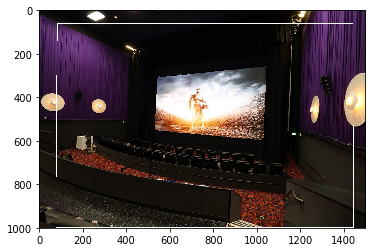

In [8]:
old_points , new_points = get_old_and_newpoints("screen_2.jpg")

In [9]:
Cam_mat= get_perspective_transform(old_points,new_points)

(1000, 1500)


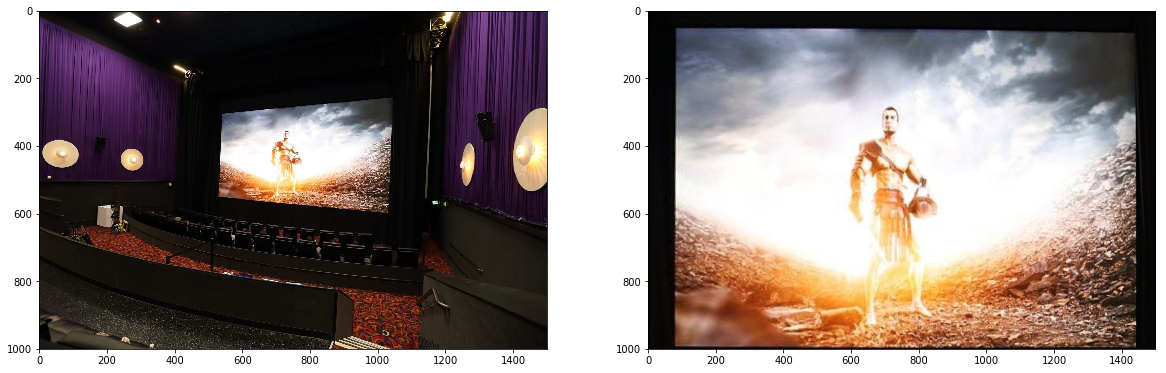

In [10]:
image=plt.imread("screen_2.jpg")
warped=perspective_warping(image,Cam_mat)
img, (x0,x1) =plt.subplots(1,2,figsize=(20,40))
x0.imshow(image)
x1.imshow(warped)
